In [2]:
import pandas as pd

# Đọc dữ liệu từ file Excel
file_path = r"C:\Users\Admin\Downloads\Cuộc thi Data Explores 2025\Data_V1.xlsx"  # Đổi tên file nếu cần
df = pd.read_excel(file_path, sheet_name="Dữ liệu bán hàng")

# Xem trước dữ liệu
df.head()


,Ngày hạch toán,Đơn hàng,Mã KH,Mã Sản Phẩm,Số lượng bán,Đơn giá,Doanh thu,Giá vốn hàng hóa,Mã nhân viên bán,Chi nhánh,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,2024-01-01,ĐH3381365,KH-0052,P-396,10,1215000,12150000,8100000,NV190,CN HN,NaN,NaN,NaN,NaN,NaN
1,2024-01-01,ĐH8038262,KH-0257,P-545,5,11655000,58275000,38850000,NV164,CN DN,NaN,NaN,NaN,NaN,NaN
2,2024-01-01,ĐH9049637,KH-0727,P-072,7,165000,1155000,770000,NV192,CN DN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01,ĐH1602374,KH-0716,P-530,3,28980000,86940000,57960000,NV233,CN HN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01,ĐH8875469,KH-0210,P-204,5,42120000,210600000,140400000,NV089,CN DN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Chọn cột liên quan đến khách hàng và doanh thu
df_khachhang = df.groupby("Mã KH")["Doanh thu"].sum().reset_index()

# Xem thống kê cơ bản
df_khachhang.describe()


,Doanh thu
count,7.860000e+02
mean,1.315697e+09
std,1.180517e+09
min,3.376500e+07
25%,5.350912e+08
50%,9.410400e+08
75%,1.703074e+09
max,8.124705e+09


In [4]:
from sklearn.cluster import KMeans
import numpy as np

# Chọn số cụm K
k = 3  

# Áp dụng K-Means
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_khachhang["Cluster"] = kmeans.fit_predict(df_khachhang[["Doanh thu"]])

# Xem kết quả
df_khachhang.head()


,Mã KH,Doanh thu,Cluster
0,KH-0001,4918980000,2
1,KH-0002,286125000,0
2,KH-0003,35070000,0
3,KH-0004,3520800000,1
4,KH-0005,1635870000,1


In [5]:
# Xác định khoảng doanh thu cho từng nhóm
group_ranges = df_khachhang.groupby("Cluster")["Doanh thu"].agg(["min", "max", "mean"]).sort_values("mean")
group_ranges


,min,max,mean
Cluster,,,
0,33765000,1525080000,7.412695e+08
1,1538760000,3701925000,2.314381e+09
2,3867315000,8124705000,5.270441e+09


In [6]:
# Tạo dictionary để đặt tên nhóm
labels = {
    group_ranges.index[0]: "Tiềm Năng",
    group_ranges.index[1]: "Trung Thành",
    group_ranges.index[2]: "VIP"
}

# Gán nhãn cho từng khách hàng
df_khachhang["Nhóm KH"] = df_khachhang["Cluster"].map(labels)

# Xem kết quả
df_khachhang.head()


,Mã KH,Doanh thu,Cluster,Nhóm KH
0,KH-0001,4918980000,2,VIP
1,KH-0002,286125000,0,Tiềm Năng
2,KH-0003,35070000,0,Tiềm Năng
3,KH-0004,3520800000,1,Trung Thành
4,KH-0005,1635870000,1,Trung Thành


In [7]:
print("Phân nhóm khách hàng theo doanh thu:")
for cluster, row in group_ranges.iterrows():
    print(f"Nhóm {labels[cluster]}: {row['min']:.0f} - {row['max']:.0f} VND")


Phân nhóm khách hàng theo doanh thu:
Nhóm Tiềm Năng: 33765000 - 1525080000 VND
Nhóm Trung Thành: 1538760000 - 3701925000 VND
Nhóm VIP: 3867315000 - 8124705000 VND


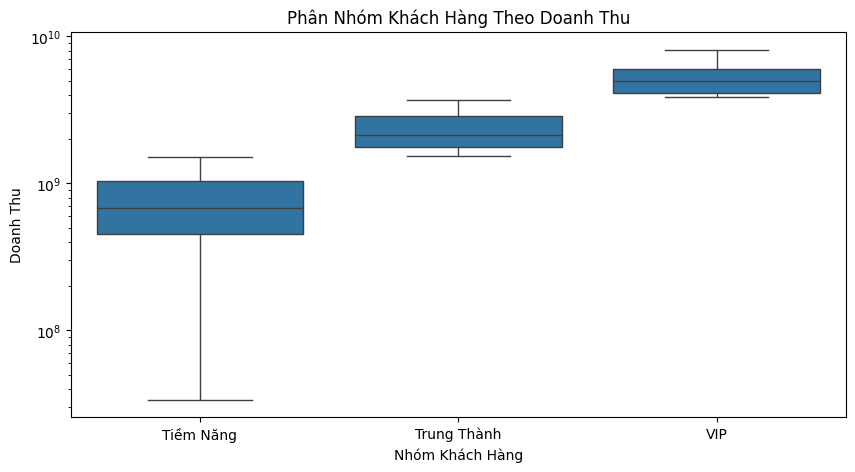

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ phân bố doanh thu theo nhóm khách hàng
plt.figure(figsize=(10,5))
sns.boxplot(x="Nhóm KH", y="Doanh thu", data=df_khachhang, order=["Tiềm Năng", "Trung Thành", "VIP"])
plt.title("Phân Nhóm Khách Hàng Theo Doanh Thu")
plt.xlabel("Nhóm Khách Hàng")
plt.ylabel("Doanh Thu")
plt.yscale("log")  # Dùng log để dễ nhìn nếu dữ liệu chênh lệch lớn
plt.show()

